In [7]:
import pandas as pd

# Loading files and prining first five rows 
sentiment_df = pd.read_csv("C:/Users/arjun/Downloads/fear_greed_index.csv")  
print(sentiment_df.head())

trader_df = pd.read_csv("C:/Users/arjun/Downloads/historical_data.csv") 
print(trader_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [11]:
# Convert 'date' in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Convert 'Timestamp IST' to datetime and extract only the date part
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])  # match sentiment_df format


In [15]:
# Merge sentiment and trader data on 'date' and reading first five
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
print(merged_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

In [17]:
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print(avg_pnl_by_sentiment)


classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [21]:
#number of trades per sentiment
trade_counts = merged_df['classification'].value_counts()
print(trade_counts)


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [23]:
#Average Trade Size per Sentiment
avg_size_usd = merged_df.groupby('classification')['Size USD'].mean()
print(avg_size_usd)


classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


In [25]:
#winrate per sentiment 
win_rate = merged_df.copy()
win_rate['Win'] = win_rate['Closed PnL'] > 0
win_rate_group = win_rate.groupby('classification')['Win'].mean().reset_index()
win_rate_group.columns = ['Sentiment', 'Win Rate']
print(win_rate_group)


       Sentiment  Win Rate
0   Extreme Fear  0.370607
1  Extreme Greed  0.464943
2           Fear  0.420768
3          Greed  0.384828
4        Neutral  0.396991


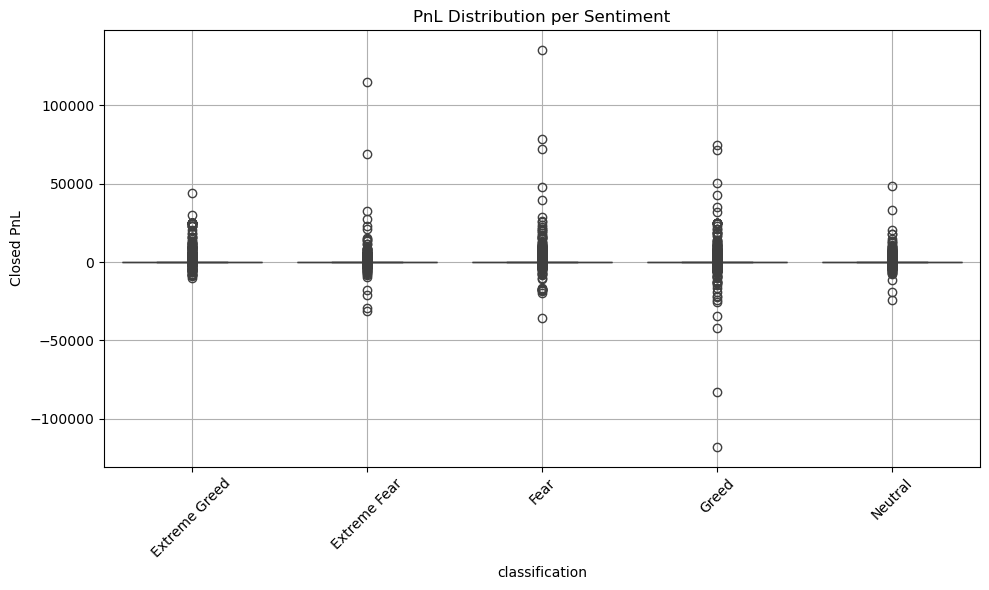

In [31]:
#profit and loss  at end of trade
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('PnL Distribution per Sentiment')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
